In [241]:
import os
import re

import shutil
import codecs, json 
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
import sklearn as sk
import time
from dypac import Dypac
import nilearn
from nilearn import image, plotting, datasets
from nilearn.input_data import NiftiLabelsMasker, NiftiMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.decomposition import DictLearning, CanICA
from scipy.stats import pearsonr
import nilearn.plotting as plotting
import math
import hcp_utils as hcp

import conf
import helper_functions
import roi_analysis_func
import importlib

## Load the concatenated files

In [242]:
#All data - in d
dir_name = conf.CONCATENATED_DATA_DIR

#Sample data - in local folder
#dir_name = conf.BASE_DIR + 'RS_data/concatenated_data_sample_preprocessed/'
    
subjects = os.listdir(dir_name)

subjects

['100206.npz',
 '209834.npz',
 '209935.npz',
 '250932.npz',
 '214625.npz',
 '251833.npz',
 '214524.npz',
 '210011.npz',
 '210112.npz',
 '214726.npz',
 '255639.npz',
 '217126.npz',
 '210415.npz',
 '255740.npz',
 '217429.npz',
 '210617.npz',
 '256540.npz',
 '219231.npz',
 '211114.npz',
 '257542.npz',
 '220721.npz',
 '211215.npz',
 '257845.npz',
 '221319.npz',
 '211316.npz',
 '257946.npz',
 '223929.npz',
 '211417.npz',
 '263436.npz',
 '224022.npz',
 '211619.npz',
 '268850.npz',
 '227432.npz',
 '211720.npz',
 '270332.npz',
 '227533.npz',
 '211821.npz',
 '274542.npz',
 '228434.npz',
 '211922.npz',
 '275645.npz',
 '231928.npz',
 '212015.npz',
 '280739.npz',
 '233326.npz',
 '212116.npz',
 '280941.npz',
 '237334.npz',
 '212217.npz',
 '281135.npz',
 '238033.npz',
 '212318.npz',
 '283543.npz',
 '239136.npz',
 '212419.npz',
 '285345.npz',
 '239944.npz',
 '212823.npz',
 '285446.npz',
 '245333.npz',
 '213017.npz',
 '286347.npz',
 '246133.npz',
 '213421.npz',
 '286650.npz',
 '248339.npz',
 '213522.n

In [243]:
len(subjects)

992

In [244]:
paths = []
for sub in subjects:
    paths.append(dir_name + '{0}'.format(sub))
data = paths
data

['/mnt/d/HCP_Liz/concatenated_data/100206.npz',
 '/mnt/d/HCP_Liz/concatenated_data/209834.npz',
 '/mnt/d/HCP_Liz/concatenated_data/209935.npz',
 '/mnt/d/HCP_Liz/concatenated_data/250932.npz',
 '/mnt/d/HCP_Liz/concatenated_data/214625.npz',
 '/mnt/d/HCP_Liz/concatenated_data/251833.npz',
 '/mnt/d/HCP_Liz/concatenated_data/214524.npz',
 '/mnt/d/HCP_Liz/concatenated_data/210011.npz',
 '/mnt/d/HCP_Liz/concatenated_data/210112.npz',
 '/mnt/d/HCP_Liz/concatenated_data/214726.npz',
 '/mnt/d/HCP_Liz/concatenated_data/255639.npz',
 '/mnt/d/HCP_Liz/concatenated_data/217126.npz',
 '/mnt/d/HCP_Liz/concatenated_data/210415.npz',
 '/mnt/d/HCP_Liz/concatenated_data/255740.npz',
 '/mnt/d/HCP_Liz/concatenated_data/217429.npz',
 '/mnt/d/HCP_Liz/concatenated_data/210617.npz',
 '/mnt/d/HCP_Liz/concatenated_data/256540.npz',
 '/mnt/d/HCP_Liz/concatenated_data/219231.npz',
 '/mnt/d/HCP_Liz/concatenated_data/211114.npz',
 '/mnt/d/HCP_Liz/concatenated_data/257542.npz',
 '/mnt/d/HCP_Liz/concatenated_data/22072

In [245]:
#Delate the npz ending
subjects_num = []

for i in range(len(subjects)):
    subjects_num.append(subjects[i][:6])

##Convert subject nums from strings to integers
subjects_num = list(map(int, subjects_num))
subjects_num

[100206,
 209834,
 209935,
 250932,
 214625,
 251833,
 214524,
 210011,
 210112,
 214726,
 255639,
 217126,
 210415,
 255740,
 217429,
 210617,
 256540,
 219231,
 211114,
 257542,
 220721,
 211215,
 257845,
 221319,
 211316,
 257946,
 223929,
 211417,
 263436,
 224022,
 211619,
 268850,
 227432,
 211720,
 270332,
 227533,
 211821,
 274542,
 228434,
 211922,
 275645,
 231928,
 212015,
 280739,
 233326,
 212116,
 280941,
 237334,
 212217,
 281135,
 238033,
 212318,
 283543,
 239136,
 212419,
 285345,
 239944,
 212823,
 285446,
 245333,
 213017,
 286347,
 246133,
 213421,
 286650,
 248339,
 213522,
 287248,
 249947,
 214019,
 289555,
 250427,
 214221,
 290136,
 268749,
 214423,
 293748,
 295146,
 322224,
 297655,
 325129,
 298051,
 100307,
 329440,
 298455,
 299154,
 100408,
 330324,
 299760,
 300618,
 100610,
 334635,
 300719,
 303119,
 101006,
 339847,
 303624,
 304020,
 101107,
 342129,
 304727,
 305830,
 101309,
 346945,
 307127,
 308129,
 101915,
 349244,
 308331,
 309636,
 102008,
 

## Load masks and extract the relevant indices
Have to be binary masks

In [246]:
importlib.reload(conf)

dir_name = conf.BASE_DIR + conf.MASKS_PATH + 'masks_str/'

masks_path = os.listdir(dir_name)
masks_path

['mask_value_str_vmPFC_barta.dtseries.nii', 'viz_union_mask.dtseries.nii']

In [247]:
masks = []
for mask in masks_path:
    masks.append(dir_name + '{0}'.format(mask))

masks

['/mnt/c/Users/liz/Contacts/Desktop/ValuePercept/ROI_analysis/masks/masks_str/mask_value_str_vmPFC_barta.dtseries.nii',
 '/mnt/c/Users/liz/Contacts/Desktop/ValuePercept/ROI_analysis/masks/masks_str/viz_union_mask.dtseries.nii']

In [248]:
importlib.reload(conf)

idx = {}
keys = ["ROI1", "ROI2"]

for i,m in enumerate(masks):
    #Load mask
    print(m)
    img = nib.load(m)
    mask = img.get_fdata()
    #Validate that this is a binary mask
    if len(np.unique(mask)) != 2:
        print("Not a binary mask")
    mask = np.reshape(mask, (mask.shape[1],))
    #Get the indices according to this mask
    idx[keys[i]] = roi_analysis_func.idx_mask(mask)

#idx    

/mnt/c/Users/liz/Contacts/Desktop/ValuePercept/ROI_analysis/masks/masks_str/mask_value_str_vmPFC_barta.dtseries.nii
/mnt/c/Users/liz/Contacts/Desktop/ValuePercept/ROI_analysis/masks/masks_str/viz_union_mask.dtseries.nii


In [250]:
print("The length of the ROI1 indices is {}".format(len(idx["ROI1"])))
print("The length of the ROI2 indices is {}".format(len(idx["ROI2"])))
#print("The length of the ROI3 indices is {}".format(len(idx["ROI3"])))

The length of the ROI1 indices is 544
The length of the ROI2 indices is 4690


In [252]:
idx.keys()

dict_keys(['ROI1', 'ROI2'])

## Extract indices of masks from each subject and calculate the corr

In [253]:
masks_mean = {}
keys_masks_mean = ["ROI1", "ROI2"]
res = {}

for i,sub in enumerate(data):
    load_data = np.load(data[i])['a']
    masks_vertex = {}
    for j, mask in enumerate(idx.keys()):
        #extract the relevant indices from the subject's data
        masks_vertex[mask] = load_data[:,idx[mask]]
        #print(masks_vertex[mask].shape)
        #average across columns
        masks_mean[keys_masks_mean[j]] = masks_vertex[mask].mean(axis=1)
        #print(masks_mean[keys_masks_mean[j]].shape)
    #correlate between the ROIs:
    x = masks_mean[keys_masks_mean[0]]
    y = masks_mean[keys_masks_mean[1]]
    res[subjects_num[i]] = pearsonr(x, y)
    print("finished subject {0}".format(i), flush = True)
        
    
#res

finished subject 0
finished subject 1
finished subject 2
finished subject 3
finished subject 4
finished subject 5
finished subject 6
finished subject 7
finished subject 8
finished subject 9
finished subject 10
finished subject 11
finished subject 12
finished subject 13
finished subject 14
finished subject 15
finished subject 16
finished subject 17
finished subject 18
finished subject 19
finished subject 20
finished subject 21
finished subject 22
finished subject 23
finished subject 24
finished subject 25
finished subject 26
finished subject 27
finished subject 28
finished subject 29
finished subject 30
finished subject 31
finished subject 32
finished subject 33
finished subject 34
finished subject 35
finished subject 36
finished subject 37
finished subject 38
finished subject 39
finished subject 40
finished subject 41
finished subject 42
finished subject 43
finished subject 44
finished subject 45
finished subject 46
finished subject 47
finished subject 48
finished subject 49
finished s

finished subject 396
finished subject 397
finished subject 398
finished subject 399
finished subject 400
finished subject 401
finished subject 402
finished subject 403
finished subject 404
finished subject 405
finished subject 406
finished subject 407
finished subject 408
finished subject 409
finished subject 410
finished subject 411
finished subject 412
finished subject 413
finished subject 414
finished subject 415
finished subject 416
finished subject 417
finished subject 418
finished subject 419
finished subject 420
finished subject 421
finished subject 422
finished subject 423
finished subject 424
finished subject 425
finished subject 426
finished subject 427
finished subject 428
finished subject 429
finished subject 430
finished subject 431
finished subject 432
finished subject 433
finished subject 434
finished subject 435
finished subject 436
finished subject 437
finished subject 438
finished subject 439
finished subject 440
finished subject 441
finished subject 442
finished subj

finished subject 787
finished subject 788
finished subject 789
finished subject 790
finished subject 791
finished subject 792
finished subject 793
finished subject 794
finished subject 795
finished subject 796
finished subject 797
finished subject 798
finished subject 799
finished subject 800
finished subject 801
finished subject 802
finished subject 803
finished subject 804
finished subject 805
finished subject 806
finished subject 807
finished subject 808
finished subject 809
finished subject 810
finished subject 811
finished subject 812
finished subject 813
finished subject 814
finished subject 815
finished subject 816
finished subject 817
finished subject 818
finished subject 819
finished subject 820
finished subject 821
finished subject 822
finished subject 823
finished subject 824
finished subject 825
finished subject 826
finished subject 827
finished subject 828
finished subject 829
finished subject 830
finished subject 831
finished subject 832
finished subject 833
finished subj

In [254]:
len(res)

992

In [255]:
res_df = pd.DataFrame.from_dict(res, orient='index', columns = ["R", "p"])
res_df

,R,p
100206,0.110085,2.038357e-14
209834,0.008088,5.753510e-01
209935,0.113926,2.438365e-15
250932,0.211143,1.658048e-49
214625,0.222082,1.040344e-54
...,...,...
208327,0.118206,2.099859e-16
208630,0.337081,7.389111e-128
209127,0.114672,1.600220e-15
209228,0.117577,3.028207e-16


In [256]:
res_df.to_csv(conf.RESULTS_DIR + 'res_vis_value.csv')

In [529]:
mask_mean = vmPFC_vertex.mean(axis=1)
mask_mean

array([-0.2846296 , -0.35797791, -0.59127313, ...,  0.37383669,
        0.41373788,  0.65850732])

In [530]:
mask_mean.shape

(4800,)

In [531]:
vis_vertex = load_data[:,idx["vis_idx"]]
vis_vertex.shape

(4800, 4690)

In [532]:
mask_mean_vis = vis_vertex.mean(axis=1)

In [533]:
mask_mean_vis

array([ 0.04934248,  0.01462868,  0.09469264, ...,  0.22652799,
        0.15622384, -0.04808568])

In [538]:
x = mask_mean
y = mask_mean_vis
res = pearsonr(x, y)
res

(0.11230270348407774, 6.034337192935409e-15)

## PCA 

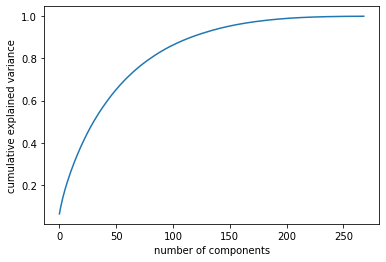

In [124]:
from sklearn.decomposition import PCA

pca = PCA().fit(vmPFC_vertex)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [126]:
X = vmPFC_vertex
pca = PCA(n_components=150)
pca.fit(X)

PCA(n_components=150)

In [127]:
print(pca.components_)

[[ 0.04066414  0.03055219  0.03173643 ...  0.02554792  0.02575994
   0.03492895]
 [ 0.03732812  0.02593118  0.01804388 ... -0.02886574 -0.02809317
  -0.02983774]
 [-0.01154464 -0.04417088 -0.0586226  ...  0.00702537 -0.00291222
   0.00097016]
 ...
 [ 0.06010773  0.09982898 -0.00734965 ...  0.04501041 -0.04553196
   0.02307141]
 [ 0.10842215  0.05011927  0.03455663 ...  0.03649253 -0.02097472
   0.03936896]
 [ 0.01270853  0.0909522  -0.00520483 ...  0.05538286 -0.06460964
   0.10877314]]


In [128]:
print(pca.explained_variance_)

[17.03613376  7.91458089  6.52044304  6.29917865  5.54705348  5.08651519
  4.95705691  4.62501528  4.44077309  4.37236083  4.10365052  4.01352376
  3.88745738  3.75114398  3.69619614  3.62389178  3.40198846  3.37568094
  3.29578143  3.27549531  3.1620575   3.0594915   3.02223795  2.97814376
  2.90187006  2.84528208  2.76800051  2.67352526  2.64257023  2.60147124
  2.50766173  2.48798964  2.39568626  2.37607444  2.30806491  2.24734737
  2.23829059  2.19157205  2.13740034  2.10481445  2.08651204  2.0258261
  1.98897714  1.94504761  1.92429834  1.90902765  1.86173463  1.83176867
  1.7740679   1.74337289  1.71624139  1.71014702  1.6622479   1.62327372
  1.59113072  1.57132472  1.55366372  1.52921591  1.49909116  1.46215546
  1.4233532   1.39425361  1.39103373  1.36370961  1.33907071  1.31273756
  1.29028617  1.26707949  1.25080288  1.2356993   1.2112281   1.20360206
  1.15875973  1.14336038  1.10702978  1.09561858  1.08711464  1.05982541
  1.04785899  1.02023163  1.01572175  0.99654372  0.

In [129]:
from sklearn.decomposition import RandomizedPCA
X = vmPFC_vertex
pca = RandomizedPCA(150)
pca.fit(X)

ImportError: cannot import name 'RandomizedPCA' from 'sklearn.decomposition' (/home/lizakson/miniconda3/lib/python3.7/site-packages/sklearn/decomposition/__init__.py)

### Convert ICA results to binary masks

In [237]:
importlib.reload(conf)

#file = conf.vmPFC_mask_file
#file = conf.BASE_DIR + 'ROI_analysis/SC_clusters.dtseries.nii'
#file = conf.BASE_DIR + 'ROI_analysis/masks/mask_value_str_vmPFC.dtseries.nii'
#file = conf.BASE_DIR + 'ROI_analysis/masks/masks_str/mask_str_partial.dtseries.nii'
file = conf.BASE_DIR + 'ROI_analysis/masks/masks_str/viz_union_mask.dtseries.nii'

img = nib.load(file)
mask = img.get_fdata()

In [238]:
mask.shape

(1, 91282)

<AxesSubplot:>

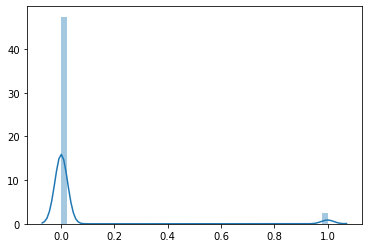

In [239]:
sns.distplot(mask)

In [240]:
np.unique(mask)

array([0., 1.])

In [204]:
#row_idx = np.array([0,1,7,9,23,25]) #str componants
row_idx = np.array([0,1]) #partial-str componants
mask = mask[row_idx, :]
mask 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [205]:
mask.shape

(2, 91282)

In [206]:
#binarize mask
importlib.reload(roi_analysis_func)
mask_bin = roi_analysis_func.binarize_mask(mask, thr = 1.0)

In [207]:
np.unique(mask_bin)

array([0., 1.])

<AxesSubplot:>

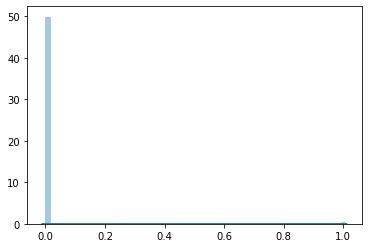

In [208]:
sns.distplot(mask_bin)

In [210]:
mask_sum = mask_bin[0] + mask_bin[1]

In [211]:
np.unique(mask_sum)

array([0., 1.])

In [212]:
mask_sum.shape

(91282,)

In [213]:
#Combine between all the components
#importlib.reload(roi_analysis_func)
#mask_sum = roi_analysis_func.masks_union(mask_bin)

In [214]:
np.unique(mask_sum)

array([0., 1.])

<AxesSubplot:>

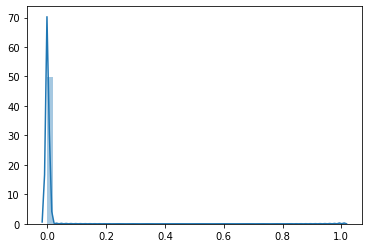

In [215]:
sns.distplot(mask_sum) 

In [216]:
mask_final = roi_analysis_func.binarize_mask(mask_sum, thr = 1)

<AxesSubplot:>

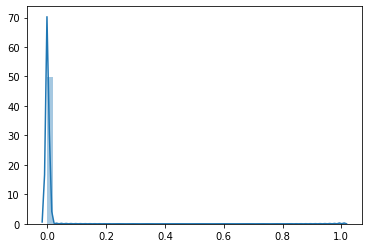

In [217]:
sns.distplot(mask_final) 

In [218]:
np.unique(mask_final)

array([0., 1.])

In [219]:
importlib.reload(roi_analysis_func)
idx = roi_analysis_func.idx_mask(mask_final)
len(idx)

275

In [220]:
mask_final = np.reshape(mask_final, (1, mask_final.shape[0]))

In [221]:
mask_final.shape

(1, 91282)

In [222]:
file = conf.BASE_DIR + 'ROI_analysis/vmpfc_mask_draw.dtseries.nii'
template = nib.load(file)
data = mask_final
to_save = nib.cifti2.cifti2.Cifti2Image(data, template.header)
nib.save(to_save, 'mask_str_partial_barta.dtseries.nii')

### Combine two ROIS to one mask

In [223]:
importlib.reload(conf)

dir_name = conf.BASE_DIR + conf.MASKS_PATH + 'masks_str/'

masks_path = os.listdir(dir_name)
masks_path

['mask_str_partial_barta.dtseries.nii', 'vmpfc_mask_draw.dtseries.nii']

In [224]:
masks = []
for mask in masks_path:
    masks.append(dir_name + '{0}'.format(mask))

masks

['/mnt/c/Users/liz/Contacts/Desktop/ValuePercept/ROI_analysis/masks/masks_str/mask_str_partial_barta.dtseries.nii',
 '/mnt/c/Users/liz/Contacts/Desktop/ValuePercept/ROI_analysis/masks/masks_str/vmpfc_mask_draw.dtseries.nii']

In [225]:
masks_load = {}
keys = ["ROI1", "ROI2"]

for i,m in enumerate(masks):
    #Load mask
    print(m)
    img = nib.load(m)
    mask = img.get_fdata()
    masks_load[keys[i]] = mask
    
masks_load

/mnt/c/Users/liz/Contacts/Desktop/ValuePercept/ROI_analysis/masks/masks_str/mask_str_partial_barta.dtseries.nii
/mnt/c/Users/liz/Contacts/Desktop/ValuePercept/ROI_analysis/masks/masks_str/vmpfc_mask_draw.dtseries.nii


{'ROI1': memmap([[0., 0., 0., ..., 0., 0., 0.]]),
 'ROI2': memmap([[0., 0., 0., ..., 0., 0., 0.]])}

<AxesSubplot:>

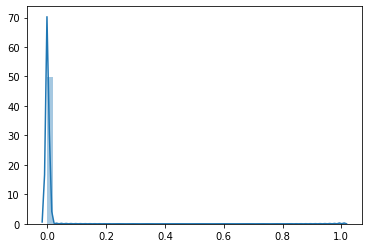

In [226]:
sns.distplot(masks_load["ROI1"])

In [228]:
np.unique(masks_load["ROI2"])

array([0., 1.])

In [229]:
union = masks_load["ROI1"] + masks_load["ROI2"]

In [230]:
union.shape

(1, 91282)

<AxesSubplot:>

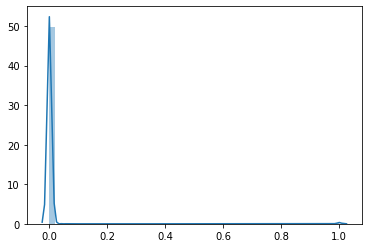

In [231]:
sns.distplot(union)

In [232]:
np.unique(union)

array([0., 1.])

In [233]:
#importlib.reload(roi_analysis_func)
#mask_final = roi_analysis_func.binarize_mask(union, thr = 1.0)

In [234]:
union.shape

(1, 91282)

In [235]:
file = conf.BASE_DIR + 'ROI_analysis/vmpfc_mask_draw.dtseries.nii'
template = nib.load(file)
data = union
to_save = nib.cifti2.cifti2.Cifti2Image(data, template.header)
nib.save(to_save, 'mask_value_str_vmPFC_barta.dtseries.nii')